# Proyecto de Naive Bayes

Este caso se trata de un banco (Thera Bank) que tiene una base de clientes en crecimiento. La mayoría de estos clientes son clientes pasivos (depositantes) con depósitos de tamaño variable. El número de clientes que también son prestatarios (clientes de activos) es bastante pequeño y el banco está interesado en expandir esta base rápidamente para atraer más negocios de préstamos y, en el proceso, ganar más a través de los intereses de los préstamos. En particular, la administración quiere explorar formas de convertir a sus clientes pasivos en clientes de préstamos personales (mientras los retiene como depositantes). Una campaña que el banco llevó a cabo el año pasado para clientes de responsabilidad mostró una tasa de conversión saludable de más del 9% de éxito. Esto ha animado al departamento de marketing minorista a diseñar campañas para mejorar el marketing de objetivos para aumentar la tasa de éxito con un presupuesto mínimo.

El departamento quiere construir un modelo que les ayude a identificar a los clientes potenciales que tienen una mayor probabilidad de comprar el préstamo. Esto aumentará la tasa de éxito y, al mismo tiempo, reducirá el costo de la campaña.

Este conjunto de datos contiene las siguientes características:

 * ID: ID de cliente
 * Edad: Edad del cliente en años completos
 * Experiencia: # años de experiencia profesional
 * Ingresos: Ingresos anuales del cliente
 * Familia: Tamaño de la familia del cliente
 * uso_tc =  Prom. gasto en tarjetas de crédito por mes
 * Educación: Nivel educativo. 1: Licenciatura; 2: Licenciado; 3: avanzado / profesional
 * Hipoteca: Valor de la hipoteca de la casa, si corresponde.
 * Préstamo: ¿Este cliente aceptó el préstamo personal ofrecido en la última campaña? 1 = si, 0 = no
 * Cuenta: ¿Tiene el cliente una cuenta de ahorro en el banco? 1 = si, 0 = no
 * certificados: ¿Tiene el cliente una cuenta de certificado de depósito (CD) con el banco? 1 = si, 0 = no
 * Online: ¿El cliente utiliza servicios bancarios por Internet? 1 = si, 0 = no
 * tarjeta: ¿El cliente utiliza una tarjeta de crédito emitida por UniversalBank? 1 = si, 0 = no

## Importar bibliotecas

**Importe algunas bibliotecas que crea que necesitará (¡o simplemente impórtelas a medida que avanza!)**

## Obtención de datos
**Lea el archivo prestamos.xlsx y configúrelo en un dataframe llamado df.**

# Exploración y Análisis de Datos

**revisa los primero 5 registros  de df, luego obten la información de valores nulos**

,ID,edad,experiencia,ingresos,familia,uso_tc,educacion,hipoteca,prestamo,cuenta,certificados,Online,tarjeta
0,1,25,1,49,4,1.6,Bachiller,0,0,1,0,0,0
1,2,45,19,34,3,1.5,Bachiller,0,0,1,0,0,0
2,3,39,15,11,1,1.0,Bachiller,0,0,0,0,0,0
3,4,35,9,100,1,2.7,Universitario,0,0,0,0,0,0
4,5,35,8,45,4,1.0,Universitario,0,0,0,0,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            5000 non-null   int64  
 1   edad          5000 non-null   int64  
 2   experiencia   5000 non-null   int64  
 3   ingresos      5000 non-null   int64  
 4   familia       5000 non-null   int64  
 5   uso_tc        5000 non-null   float64
 6   educacion     5000 non-null   object 
 7   hipoteca      5000 non-null   int64  
 8   prestamo      5000 non-null   int64  
 9   cuenta        5000 non-null   int64  
 10  certificados  5000 non-null   int64  
 11  Online        5000 non-null   int64  
 12  tarjeta       5000 non-null   int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 507.9+ KB


**Utilicemos el metodo map para cambiar la variable binaria prestamo los valores 0 y 1 por 0 = no, 1 = si**

**Cuantos clientes hay con préstamos? utiliza value_counts**

No    4520
Si     480
Name: prestamo, dtype: int64

**Un pequeño reto para ti: explora los datos estadisticos de los valores numeros con describe(), pero sin la columna ID ni la fila count que genera el describe**

,mean,std,min,25%,50%,75%,max
edad,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
experiencia,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
ingresos,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
familia,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
uso_tc,1.937913,1.747666,0.0,0.7,1.5,2.5,10.0
hipoteca,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
cuenta,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
certificados,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0
Online,0.596800,0.490589,0.0,0.0,1.0,1.0,1.0
tarjeta,0.294000,0.455637,0.0,0.0,0.0,1.0,1.0


**¿Te fijaste en algo extraño? El valor minimo del campo experiencia está negativo (-3) lo cual es incorrecto, solucionemos esto con la función abs(), aplica esta funcion a la columna experiencia para que todos los valores sean positivos y vuelve a ejecutar el describe de la linea anterior.**

,mean,std,min,25%,50%,75%,max
edad,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
experiencia,20.134600,11.415189,0.0,10.0,20.0,30.0,43.0
ingresos,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
familia,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
uso_tc,1.937913,1.747666,0.0,0.7,1.5,2.5,10.0
hipoteca,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
cuenta,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
certificados,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0
Online,0.596800,0.490589,0.0,0.0,1.0,1.0,1.0
tarjeta,0.294000,0.455637,0.0,0.0,0.0,1.0,1.0


**Excelente! Ahora un poco de visualizaciones**

En este ejercicio no vamos a hacer muchos gráficos, solo veamos si hay alguna relacion muy fuerte entre las variables.

Crean pairplot para visualizar las relaciones y la distribucion de las variables numericas. Solo use las variables continuas para este gráfico: uso_tc, ingresos, experiencia, hipoteca, edad. Utilice hue = 'prestamo', para discriminar por los que adquieren el prestamo y quienes no.

utiliza plt.figure(figsize=(15,15)) para el tamaño del gráfico

<Figure size 1500x1500 with 0 Axes>

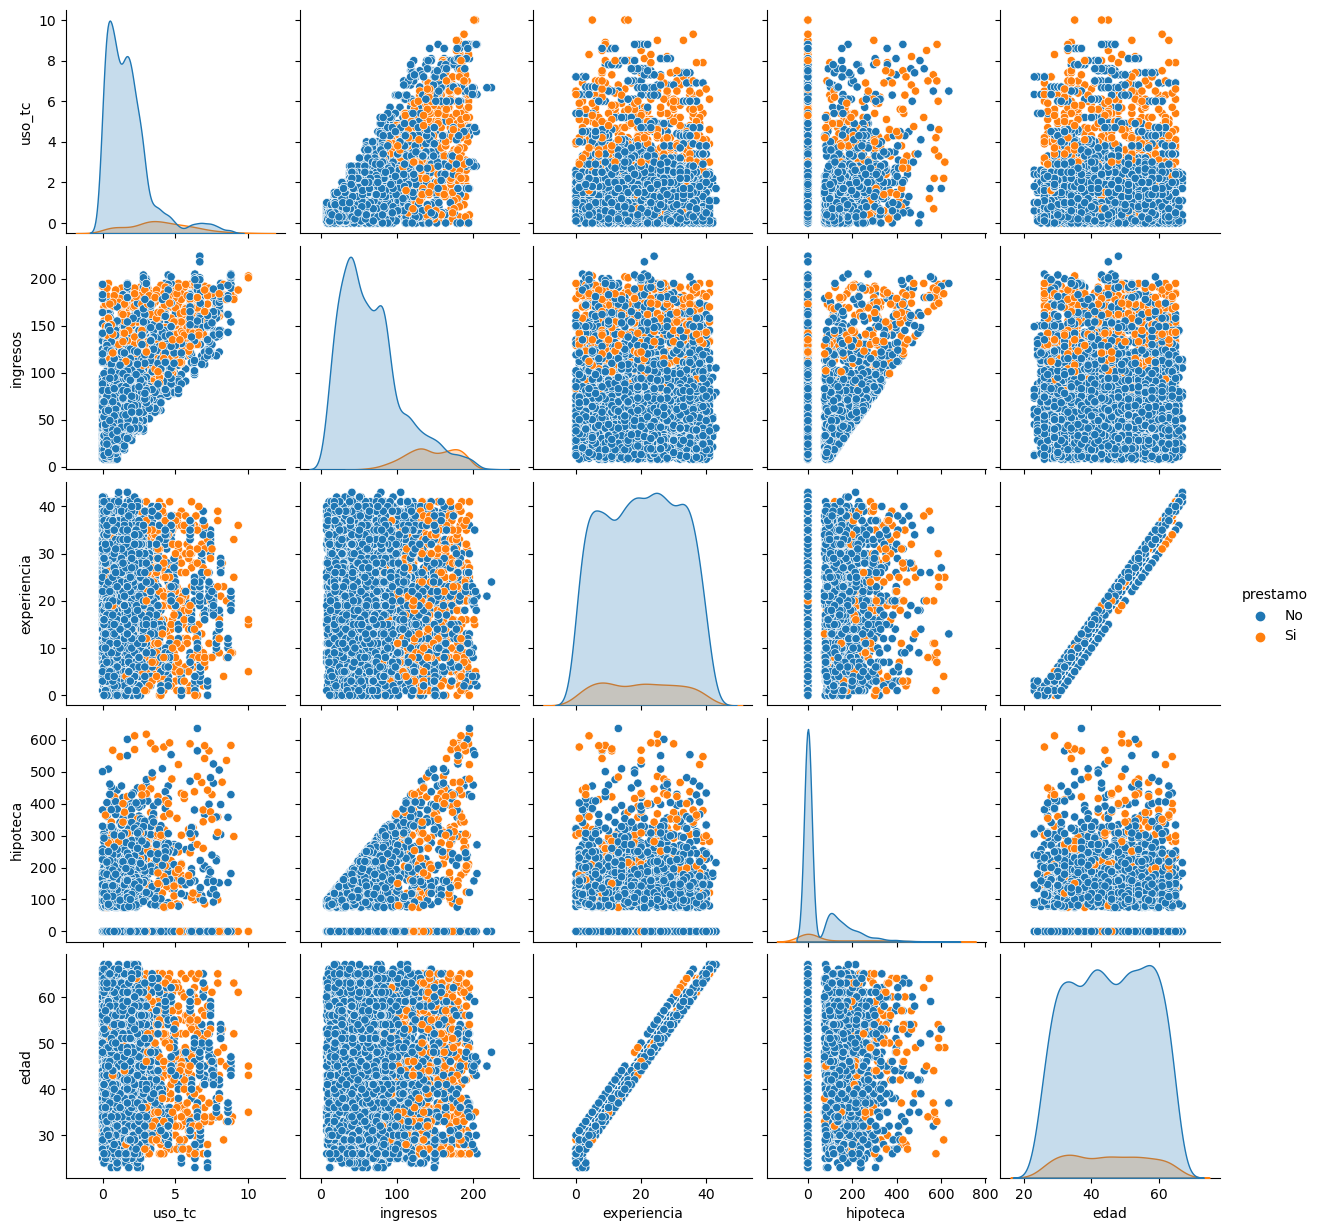

Ahora veamos el mapa de calor.

<AxesSubplot:>

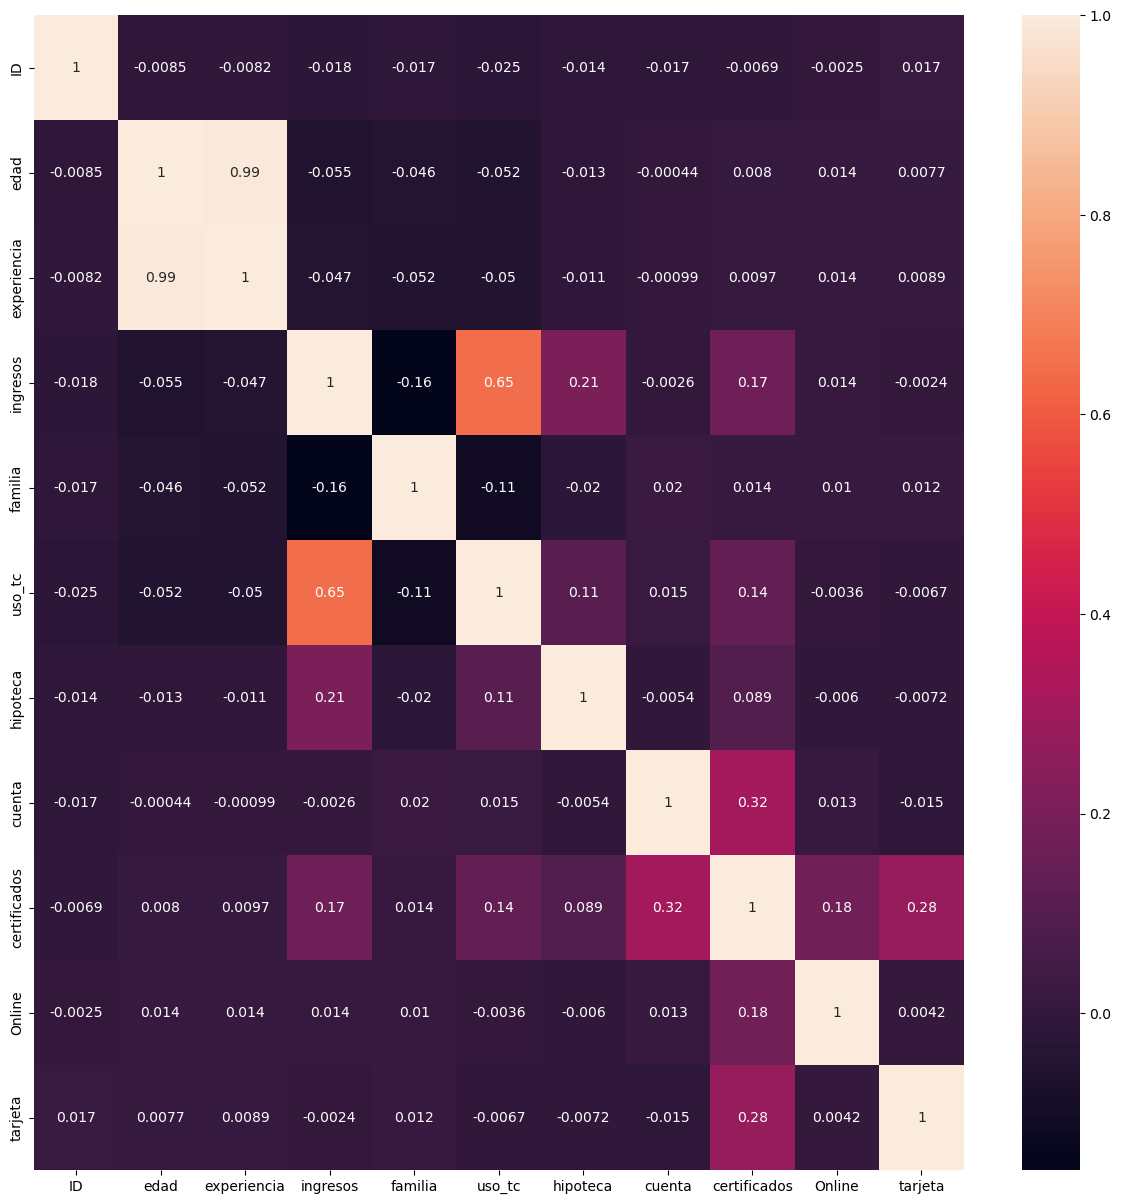

Haz algunos gráficos de barra para ver como se distribuyen los préstamos en funcion de la educacion,  certificados, cuenta.

<AxesSubplot:xlabel='prestamo', ylabel='count'>

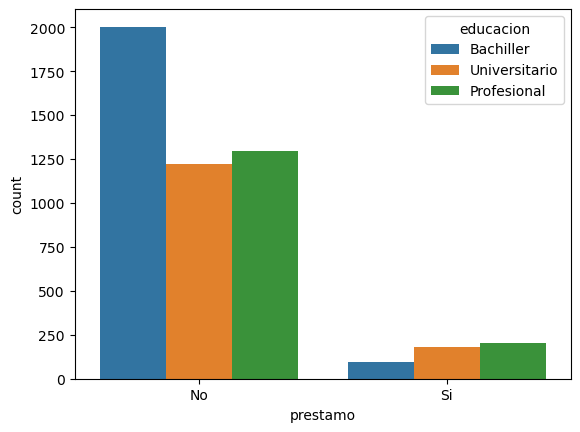

<AxesSubplot:xlabel='prestamo', ylabel='count'>

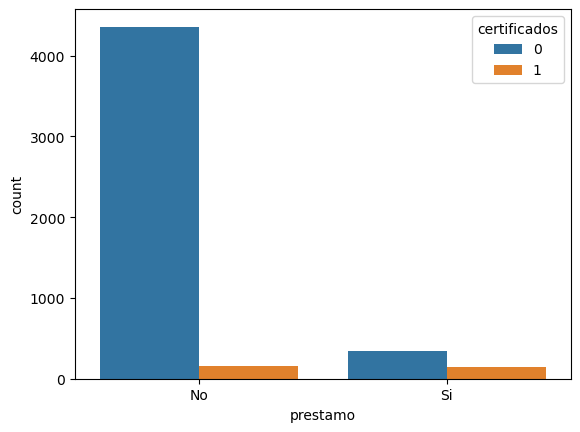

<AxesSubplot:xlabel='prestamo', ylabel='count'>

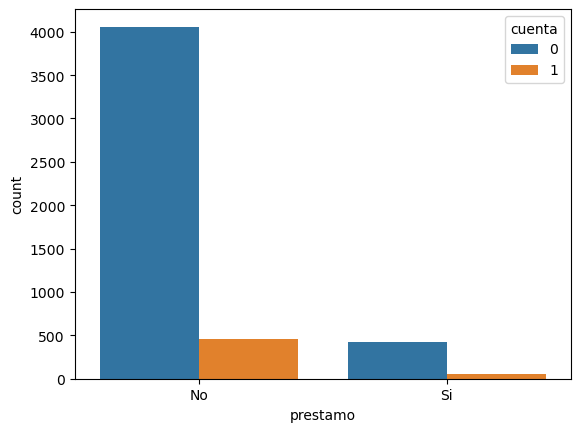

Que pudiste identificar sobre estos datos con las visualizaciones? 

# Selección de variables

Crea un dataframe "X" que contenga todas las variables menos prestamo y id, luego crea un dataframe "y" que solo tenga la columna prestamo, ambos dataframe a partir del dataframe df

¡Ahora es el momento de hacer la separación de los set de entrenamiento y prueba y entrenar nuetros modelo!

## Preprocesamiento de datos

**Utiliza las la función preprocessing vista en clase para generar los X_train_df y X_test_df**

In [ ]:
import os
os.chdir('..')
from src.preprocessing import preprocessing
#aplica la funcion preprocessing vista en clase


In [25]:
#muestra el head del X_test_df

,educacion_Bachiller,educacion_Profesional,educacion_Universitario,edad,experiencia,ingresos,familia,uso_tc,hipoteca,cuenta,certificados,Online,tarjeta
0,1.0,0.0,0.0,60.0,36.0,49.0,4.0,2.2,204.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,49.0,23.0,133.0,1.0,7.3,0.0,0.0,0.0,1.0,1.0
2,1.0,0.0,0.0,51.0,25.0,80.0,1.0,4.9,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,35.0,10.0,94.0,1.0,0.0,174.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,27.0,2.0,85.0,1.0,1.9,0.0,0.0,0.0,1.0,1.0


# Naive Bayes


**Entrena el modelo ajustandolo al algoritmo GaussianNB**

In [26]:
from sklearn.naive_bayes import GaussianNB

#instanciar modelo

#ajustar modelo a datos de entrenamiento


GaussianNB()

**Crea una variable que contenga las predicciones del dataset de prueba X_test_df, y denominala predicciones**

**Genera el reporte de clasificación**

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

              precision    recall  f1-score   support

          No       0.95      0.93      0.94      1354
          Si       0.43      0.53      0.48       146

    accuracy                           0.89      1500
   macro avg       0.69      0.73      0.71      1500
weighted avg       0.90      0.89      0.89      1500



**Genera la matriz de confusión**

C:\Users\gilbe\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


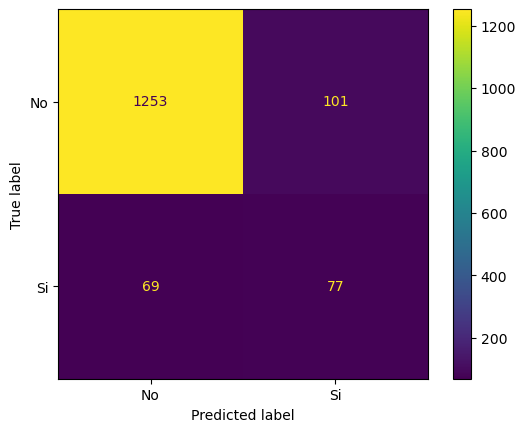

**Genera un dataframe con los resultados de la validación cruzada de los datos de prueba. Utiliza 5 folds (cv =5) y llamalo cv_score y que la columna se llame exactitud**

In [31]:
from sklearn.model_selection import cross_val_score



**Genera un gráfico de barra con el resultado de los 5 folds de cv_score y agregale una linea que contenga el valor minimo en rojo, maximo en verde y promedio en amarillo del resultado de exactitud del dataframe cv_score. Tambien que el rango del eje y esté entre 0.7 y 1, utiliza las funciones de matlotlib axhline para lineas horizontales y ylim para limite de rango eje y**

(0.7, 1.0)

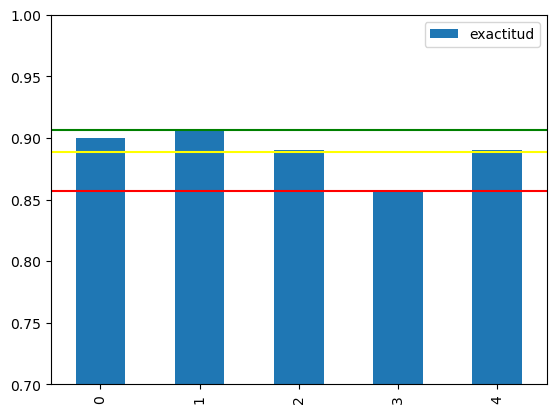

**¿Es nuestro modelo estable? Genera la descripción estadística del dataframe cv_score a ver que tanto es la desviación estandar**

,exactitud
count,5.000000
mean,0.888667
std,0.019235
min,0.856667
25%,0.890000
50%,0.890000
75%,0.900000
max,0.906667


¿Cual es la probabilidad para una persona con las siguientes características adquiera un prestamo? No olvides usar tu column_transformer.transform en los datos nuevos para que el modelo pueda predecir correctamente

* edad: 25
* experiencia: 7
* ingresos: 15
* familia: 2
* uso_tc: 2.3
* educacion: Universitario
* hipoteca: 65
* cuenta: 1
* certificados: 1
* Online: 0
* tarjeta: 1

**Defina un diccionario llamado data_nueva con las variables y datos suministrados arriba, mantenga el orden dado de las variables**

**Convierta el diccionario data_nueva en un dataframe llamado data_nueva_df**

,edad,experiencia,ingresos,familia,uso_tc,educacion,hipoteca,cuenta,certificados,Online,tarjeta
0,25,7,15,2,2.3,Universitario,65,1,1,0,1


**use el col_transformer declarado arriba con el metodo .transform para convertir el dataframe data_nueva_df en un array llamado data_nueva_df_array**

In [ ]:
import pickle

In [ ]:
col_transformer = pickle.load(open('col_transformer', 'rb'))

array([[ 0. ,  0. ,  1. , 25. ,  7. , 15. ,  2. ,  2.3, 65. ,  1. ,  1. ,
         0. ,  1. ]])

**Convierta el array data_nueva_df_array en un dataframe que tenga como columnas la lista variables declarada arriba. Llame a este dataframe: data_nueva_df_transform**

,educacion_Bachiller,educacion_Profesional,educacion_Universitario,edad,experiencia,ingresos,familia,uso_tc,hipoteca,cuenta,certificados,Online,tarjeta
0,0.0,0.0,1.0,25.0,7.0,15.0,2.0,2.3,65.0,1.0,1.0,0.0,1.0


**Listo, ahora pase su dataframe data_nueva_df_transform al modelo entrenado mediante el metodo .predict para predecir cual es la elección más probable para una persona con estas características**

['Si']


**Veamos la probabilidad de que sea alquilar o comprar. Para esto utilice el metodo .predict_proba del modelo y pase el datafram data_nueva_df_transform**

[[0.08669246 0.91330754]]
